In [510]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


## Loading the dataset

1. Batting: `batting_data.csv`
2. Bowling: `bowling_data.csv`
3. Player Name and ID Map: `player_team_name_id.csv`

In [511]:
batting_df = pd.read_csv('final_data/batting_data.csv')
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number
0,440970,0,-,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,ODI # 3417
1,440970,13*,-,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,ODI # 3418
2,440970,38*,-,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487
3,440970,3,-,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488
4,440970,15,21,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,ODI # 4661
9327,793007,DNB,-,-,-,-,-,-,-,1,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665
9328,793007,0*,12,6,0,0,0.00,11,not out,1,Australia,Lucknow,16 Oct 2023,ODI # 4671
9329,793007,DNB,-,-,-,-,-,-,-,2,Netherlands,Lucknow,21 Oct 2023,ODI # 4676


In [512]:
bowling_df = pd.read_csv('final_data/bowling_data.csv')
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,odi_number
0,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,2 Oct 2013,ODI # 3417
1,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,4 Oct 2013,ODI # 3418
2,440970,DNB,-,-,-,-,-,1,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487
3,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488
4,440970,DNB,-,-,-,-,-,2,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503
...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,ODI # 4661
9327,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665
9328,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,ODI # 4671
9329,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,ODI # 4676


In [513]:
player_data_df = pd.read_csv('final_data/player_team_name_id.csv')
player_data_df

,team_name,player_name,player_id
0,Afghanistan,Hashmatullah Shahidi,440970
1,Afghanistan,Rahmanullah Gurbaz,974087
2,Afghanistan,Ibrahim Zadran,921509
3,Afghanistan,Reyaz Hassan,1061090
4,Afghanistan,Rahmat Shah Zurmati,533956
...,...,...,...
145,Sri Lanka,Dunith Wellalage,1152427
146,Sri Lanka,Kasun Rajitha,499594
147,Sri Lanka,Matheesha Pathirana,1194795
148,Sri Lanka,Lahiru Kumara,784375


In [514]:
# Collect Team Names

team_names = player_data_df['team_name'].unique().tolist()
team_names += bowling_df['opposition'].unique().tolist()
team_names += batting_df['Opposition'].unique().tolist()
team_names = list(set(team_names))
team_names

# Encode Team Names

le = LabelEncoder()
le.fit(team_names)
batting_df['Opposition'] = le.transform(batting_df['Opposition'])
bowling_df['opposition'] = le.transform(bowling_df['opposition'])
player_data_df['team_name'] = le.transform(player_data_df['team_name'])


## Data Preprocessing

### Batting Data

In [515]:
batting_df = batting_df.merge(player_data_df, on='player_id', how='left')
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number,team_name,player_name
0,440970,0,-,3,0,0,0.00,3,caught,2,9,Sharjah,2 Oct 2013,ODI # 3417,0,Hashmatullah Shahidi
1,440970,13*,-,19,0,0,68.42,5,not out,2,9,Sharjah,4 Oct 2013,ODI # 3418,0,Hashmatullah Shahidi
2,440970,38*,-,67,4,0,56.71,4,not out,2,6,Kuala Lumpur,1 May 2014,ODI # 3487,0,Hashmatullah Shahidi
3,440970,3,-,7,0,0,42.85,4,lbw,1,18,Kuala Lumpur,2 May 2014,ODI # 3488,0,Hashmatullah Shahidi
4,440970,15,21,22,2,0,68.18,4,caught,1,21,Bulawayo,18 Jul 2014,ODI # 3503,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,16,Delhi,7 Oct 2023,ODI # 4661,17,Dilshan Madushanka
9327,793007,DNB,-,-,-,-,-,-,-,1,14,Hyderabad,10 Oct 2023,ODI # 4665,17,Dilshan Madushanka
9328,793007,0*,12,6,0,0,0.00,11,not out,1,1,Lucknow,16 Oct 2023,ODI # 4671,17,Dilshan Madushanka
9329,793007,DNB,-,-,-,-,-,-,-,2,11,Lucknow,21 Oct 2023,ODI # 4676,17,Dilshan Madushanka


In [516]:
batting_df['player_id'].value_counts()
# Valid

253802     286
56029      261
34102      256
56143      244
56025      225
          ... 
721041       4
819507       3
1139520      2
35281        2
379887       2
Name: player_id, Length: 150, dtype: int64

#### Removing unwanted columns

In [517]:
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number,team_name,player_name
0,440970,0,-,3,0,0,0.00,3,caught,2,9,Sharjah,2 Oct 2013,ODI # 3417,0,Hashmatullah Shahidi
1,440970,13*,-,19,0,0,68.42,5,not out,2,9,Sharjah,4 Oct 2013,ODI # 3418,0,Hashmatullah Shahidi
2,440970,38*,-,67,4,0,56.71,4,not out,2,6,Kuala Lumpur,1 May 2014,ODI # 3487,0,Hashmatullah Shahidi
3,440970,3,-,7,0,0,42.85,4,lbw,1,18,Kuala Lumpur,2 May 2014,ODI # 3488,0,Hashmatullah Shahidi
4,440970,15,21,22,2,0,68.18,4,caught,1,21,Bulawayo,18 Jul 2014,ODI # 3503,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,16,Delhi,7 Oct 2023,ODI # 4661,17,Dilshan Madushanka
9327,793007,DNB,-,-,-,-,-,-,-,1,14,Hyderabad,10 Oct 2023,ODI # 4665,17,Dilshan Madushanka
9328,793007,0*,12,6,0,0,0.00,11,not out,1,1,Lucknow,16 Oct 2023,ODI # 4671,17,Dilshan Madushanka
9329,793007,DNB,-,-,-,-,-,-,-,2,11,Lucknow,21 Oct 2023,ODI # 4676,17,Dilshan Madushanka


In [518]:
batting_df.drop(columns=["Mins", "4s", "6s", "SR", "odi_number"], inplace=True)

#### Runs

In [519]:
batting_df['Runs'].unique()

array(['0', '13*', '38*', '3', '15', '11', '31', '32', '72', '14', '21',
       '2*', '12', '23', '54', '2', '34*', '37', '58', '97*', '71', '9',
       '52', '59*', '47', '18', '4', '59', '8', '76', '82', '10', '73',
       '28', '5', '88', '1*', '38', '57', '9*', '22', '15*', '13', '51',
       '80', '48*', '127', '103', '7', '106*', '17', '53', '68', '145',
       '6', '151', '1', '65', '19', '121*', '106', '162', '98', '41*',
       '100', '75', '87', '50', '35', 'DNB', '34', '100*', '26', '16',
       '48', '30', '36', '78', '108*', 'TDNB', '44', '114', '43', '56',
       '69', '29', '33', '113', '62', '46', '24', '61', '103*', '70',
       '94', '55', '45', '77*', '83', '12*', '25', '89*', '81*', '8*',
       '67', '63*', '17*', '42', '20', '104*', '60*', '20*', '3*', '77',
       '7*', '6*', '23*', '60', '41', '46*', '14*', '116', '40', '49',
       '27*', '18*', '92', '64', '27', '50*', '25*', '5*', '86', '19*',
       '16*', '57*', '11*', '35*', '39*', '4*', '0*', '10*', '21*'

In [520]:
# We can notice *, DNB, TDNB, absent in runs

# Replace *23 with 23
batting_df['Runs'].replace(to_replace='\*', value='', regex=True, inplace=True)
batting_df['Runs'].unique()

array(['0', '13', '38', '3', '15', '11', '31', '32', '72', '14', '21',
       '2', '12', '23', '54', '34', '37', '58', '97', '71', '9', '52',
       '59', '47', '18', '4', '8', '76', '82', '10', '73', '28', '5',
       '88', '1', '57', '22', '51', '80', '48', '127', '103', '7', '106',
       '17', '53', '68', '145', '6', '151', '65', '19', '121', '162',
       '98', '41', '100', '75', '87', '50', '35', 'DNB', '26', '16', '30',
       '36', '78', '108', 'TDNB', '44', '114', '43', '56', '69', '29',
       '33', '113', '62', '46', '24', '61', '70', '94', '55', '45', '77',
       '83', '25', '89', '81', '67', '63', '42', '20', '104', '60', '116',
       '40', '49', '27', '92', '64', '86', '39', '117', '85', '99', '128',
       '96', '101', '152', '124', '102', '79', '66', '93', '95', '146',
       '74', '163', '178', '84', '122', '109', '173', '119', '156', '130',
       '179', '107', '166', '134', '105', 'absent', '126', '176', '136',
       '90', '110', '144', '125', '111', '112', 'sub',

In [521]:
# Get Non numeric values

batting_df[~batting_df['Runs'].str.isnumeric()]['Runs'].value_counts()

DNB       1830
TDNB       144
absent       5
sub          1
Name: Runs, dtype: int64

In [522]:
# Remove rows with DNB, TDNB, absent, sub

batting_df.drop(batting_df[batting_df['Runs'].isin(['DNB', 'TDNB', 'absent', 'sub'])].index, inplace=True)
batting_df

,player_id,Runs,BF,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,3,caught,2,9,Sharjah,2 Oct 2013,0,Hashmatullah Shahidi
1,440970,13,19,5,not out,2,9,Sharjah,4 Oct 2013,0,Hashmatullah Shahidi
2,440970,38,67,4,not out,2,6,Kuala Lumpur,1 May 2014,0,Hashmatullah Shahidi
3,440970,3,7,4,lbw,1,18,Kuala Lumpur,2 May 2014,0,Hashmatullah Shahidi
4,440970,15,22,4,caught,1,21,Bulawayo,18 Jul 2014,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,2,11,not out,2,12,Auckland,25 Mar 2023,17,Dilshan Madushanka
9322,793007,1,5,11,not out,1,11,Bulawayo,30 Jun 2023,17,Dilshan Madushanka
9325,793007,0,0,11,not out,1,11,Harare,9 Jul 2023,17,Dilshan Madushanka
9326,793007,4,2,11,not out,2,16,Delhi,7 Oct 2023,17,Dilshan Madushanka


In [523]:
batting_df[~batting_df['Runs'].str.isnumeric()]['Runs'].unique()

array([], dtype=object)

In [524]:
# Change data type of runs to int

batting_df['Runs'] = batting_df['Runs'].astype(int)
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7351 entries, 0 to 9328
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    7351 non-null   int64 
 1   Runs         7351 non-null   int64 
 2   BF           7351 non-null   object
 3   Pos          7351 non-null   object
 4   Dismissal    7351 non-null   object
 5   Inns         7351 non-null   object
 6   Opposition   7351 non-null   int64 
 7   Ground       7351 non-null   object
 8   Start        7351 non-null   object
 9   team_name    7351 non-null   int64 
 10  player_name  7351 non-null   object
dtypes: int64(4), object(7)
memory usage: 689.2+ KB


#### Data Type Conversion

In [525]:
batting_df['BF'] = batting_df['BF'].astype(int)

In [526]:
batting_df['Pos'] = batting_df['Pos'].astype(int)

In [527]:
batting_df['Dismissal'].value_counts()

caught            3730
not out           1395
bowled            1082
lbw                602
run out            375
stumped            145
retired notout      15
hit wicket           6
obstruct field       1
Name: Dismissal, dtype: int64

In [528]:
batting_df['Pos'] = batting_df['Pos'].astype(int)

In [529]:
batting_df['Ground'].value_counts()

Mirpur           467
Colombo (RPS)    321
Harare           237
Pallekele        187
The Oval         169
                ... 
Toronto            1
Jamshedpur         1
Gwalior            1
Lincoln            1
Ayr                1
Name: Ground, Length: 128, dtype: int64

In [530]:
# Collect Ground Names

ground_names = batting_df['Ground'].unique().tolist()
ground_names += bowling_df['ground'].unique().tolist()
ground_names = list(set(ground_names))
ground_names

['Adelaide',
 'Perth',
 'Abu Dhabi',
 'Benoni',
 'Cardiff',
 'Jamshedpur',
 'Paarl',
 'North Sound',
 'Wankhede',
 'Sharjah',
 'Karachi',
 'Tarouba',
 'Vadodara',
 'Auckland',
 'Colombo (PSS)',
 'Basseterre',
 'Raipur',
 'Dunedin',
 'Dubai (DSC)',
 'Thiruvananthapuram',
 'The Hague',
 'Durban',
 'Dublin',
 'Ayr',
 'Rajkot',
 'Canberra',
 'Nottingham',
 'Eden Gardens',
 'Chester-le-Street',
 'Bulawayo',
 'Albion',
 'Multan',
 'Kimberley',
 'Mohali',
 'Napier',
 'Sydney',
 'King City (NW)',
 'Providence',
 'Darwin',
 'Christchurch',
 'The Oval',
 'Wellington',
 'Greater Noida',
 'Amstelveen',
 'Kanpur',
 'Dublin (Malahide)',
 'Melbourne',
 'Hobart',
 'Mirpur',
 'Khulna',
 'Indore',
 'Ahmedabad',
 'Dambulla',
 'Southampton',
 'Rotterdam',
 'Potchefstroom',
 'Utrecht',
 "St John's",
 'Pune',
 'Bristol',
 'Dehradun',
 'Centurion',
 'Gqeberha',
 'Delhi',
 'Bogra',
 'Birmingham',
 'Lahore',
 'Port of Spain',
 'Taunton',
 'Nelson',
 'Aberdeen',
 'Castries',
 'Doha',
 'Jaipur',
 'Chelmsford',
 

In [531]:
ge = LabelEncoder()
ge.fit(ground_names)
batting_df['Ground'] = ge.transform(batting_df['Ground'])
bowling_df['ground'] = ge.transform(bowling_df['ground'])

In [532]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7351 entries, 0 to 9328
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    7351 non-null   int64 
 1   Runs         7351 non-null   int64 
 2   BF           7351 non-null   int64 
 3   Pos          7351 non-null   int64 
 4   Dismissal    7351 non-null   object
 5   Inns         7351 non-null   object
 6   Opposition   7351 non-null   int64 
 7   Ground       7351 non-null   int64 
 8   Start        7351 non-null   object
 9   team_name    7351 non-null   int64 
 10  player_name  7351 non-null   object
dtypes: int64(7), object(4)
memory usage: 689.2+ KB


### Bowling Data

In [533]:
bowling_df = bowling_df.merge(player_data_df, on='player_id', how='left')
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,odi_number,team_name,player_name
0,440970,DNB,-,-,-,-,-,1,9,109,2 Oct 2013,ODI # 3417,0,Hashmatullah Shahidi
1,440970,DNB,-,-,-,-,-,1,9,109,4 Oct 2013,ODI # 3418,0,Hashmatullah Shahidi
2,440970,DNB,-,-,-,-,-,1,6,77,1 May 2014,ODI # 3487,0,Hashmatullah Shahidi
3,440970,2.0,0,17,0,8.50,6,2,18,77,2 May 2014,ODI # 3488,0,Hashmatullah Shahidi
4,440970,DNB,-,-,-,-,-,2,21,19,18 Jul 2014,ODI # 3503,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,16,38,7 Oct 2023,ODI # 4661,17,Dilshan Madushanka
9327,793007,9.2,0,60,2,6.42,2,2,14,63,10 Oct 2023,ODI # 4665,17,Dilshan Madushanka
9328,793007,9.0,2,38,3,4.22,2,2,1,82,16 Oct 2023,ODI # 4671,17,Dilshan Madushanka
9329,793007,9.4,1,49,4,5.06,1,1,11,82,21 Oct 2023,ODI # 4676,17,Dilshan Madushanka


#### Removing unwanted columns

In [534]:
bowling_df.drop(columns=["maidens", "position", "odi_number"], inplace=True)
bowling_df

,player_id,overs,runs,wickets,economy,innings,opposition,ground,start_date,team_name,player_name
0,440970,DNB,-,-,-,1,9,109,2 Oct 2013,0,Hashmatullah Shahidi
1,440970,DNB,-,-,-,1,9,109,4 Oct 2013,0,Hashmatullah Shahidi
2,440970,DNB,-,-,-,1,6,77,1 May 2014,0,Hashmatullah Shahidi
3,440970,2.0,17,0,8.50,2,18,77,2 May 2014,0,Hashmatullah Shahidi
4,440970,DNB,-,-,-,2,21,19,18 Jul 2014,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,86,2,8.60,1,16,38,7 Oct 2023,17,Dilshan Madushanka
9327,793007,9.2,60,2,6.42,2,14,63,10 Oct 2023,17,Dilshan Madushanka
9328,793007,9.0,38,3,4.22,2,1,82,16 Oct 2023,17,Dilshan Madushanka
9329,793007,9.4,49,4,5.06,1,11,82,21 Oct 2023,17,Dilshan Madushanka


#### Overs

In [535]:
bowling_df['overs'].unique()

array(['DNB', '2.0', '1.0', 'TDNB', '3.0', '5.0', '1.5', '5.3', '6.0',
       '8.0', '4.0', '1.1', '9.0', '10.0', '9.5', '5.1', '7.0', '8.3',
       '9.4', '6.4', '5.2', '7.1', '4.1', '3.5', '8.2', '8.5', '8.1',
       '7.3', '9.2', '4.4', '4.2', '5.4', '9.3', '8.4', '7.2', '7.5',
       '4.5', '1.4', '3.2', '6.1', '6.2', '0.1', '6.5', '2.4', '0.5',
       '5.5', 'sub', '1.3', '3.1', '9.1', '6.3', '1.2', '0.2', '2.3',
       '2.5', '7.4', '0.4', '2.2', '0.3', '3.3', '4.3'], dtype=object)

In [536]:
# We can notice DNB, TDNB, sub in overs. Drop them

bowling_df.drop(bowling_df[bowling_df['overs'].isin(['DNB', 'TDNB', 'sub'])].index, inplace=True)
bowling_df['overs'] = bowling_df['overs'].astype(float)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   runs         5171 non-null   object 
 3   wickets      5171 non-null   object 
 4   economy      5171 non-null   object 
 5   innings      5171 non-null   object 
 6   opposition   5171 non-null   int64  
 7   ground       5171 non-null   int64  
 8   start_date   5171 non-null   object 
 9   team_name    5171 non-null   int64  
 10  player_name  5171 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 484.8+ KB


#### Runs

In [537]:
bowling_df['runs'] = bowling_df['runs'].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   runs         5171 non-null   int64  
 3   wickets      5171 non-null   object 
 4   economy      5171 non-null   object 
 5   innings      5171 non-null   object 
 6   opposition   5171 non-null   int64  
 7   ground       5171 non-null   int64  
 8   start_date   5171 non-null   object 
 9   team_name    5171 non-null   int64  
 10  player_name  5171 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 484.8+ KB


#### Wickets

In [538]:
bowling_df['wickets'] = bowling_df['wickets'].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   runs         5171 non-null   int64  
 3   wickets      5171 non-null   int64  
 4   economy      5171 non-null   object 
 5   innings      5171 non-null   object 
 6   opposition   5171 non-null   int64  
 7   ground       5171 non-null   int64  
 8   start_date   5171 non-null   object 
 9   team_name    5171 non-null   int64  
 10  player_name  5171 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 484.8+ KB


In [539]:
bowling_df['economy'] = bowling_df['economy'].astype(float)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   runs         5171 non-null   int64  
 3   wickets      5171 non-null   int64  
 4   economy      5171 non-null   float64
 5   innings      5171 non-null   object 
 6   opposition   5171 non-null   int64  
 7   ground       5171 non-null   int64  
 8   start_date   5171 non-null   object 
 9   team_name    5171 non-null   int64  
 10  player_name  5171 non-null   object 
dtypes: float64(2), int64(6), object(3)
memory usage: 484.8+ KB


#### Innings

In [540]:
bowling_df['innings'] = bowling_df['innings'].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 3 to 9330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   runs         5171 non-null   int64  
 3   wickets      5171 non-null   int64  
 4   economy      5171 non-null   float64
 5   innings      5171 non-null   int64  
 6   opposition   5171 non-null   int64  
 7   ground       5171 non-null   int64  
 8   start_date   5171 non-null   object 
 9   team_name    5171 non-null   int64  
 10  player_name  5171 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 484.8+ KB


### Label Encoding

We have already encoded the `team_name`, `ground_name` beforehand to avoid any data integrity issues.

#### Batting Data

In [541]:
dismissal_encoder = LabelEncoder()
dismissal_encoder.fit(batting_df['Dismissal'])
batting_df['Dismissal'] = dismissal_encoder.transform(batting_df['Dismissal'])
batting_df

,player_id,Runs,BF,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,3,1,2,9,109,2 Oct 2013,0,Hashmatullah Shahidi
1,440970,13,19,5,4,2,9,109,4 Oct 2013,0,Hashmatullah Shahidi
2,440970,38,67,4,4,2,6,77,1 May 2014,0,Hashmatullah Shahidi
3,440970,3,7,4,3,1,18,77,2 May 2014,0,Hashmatullah Shahidi
4,440970,15,22,4,1,1,21,19,18 Jul 2014,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,2,11,4,2,12,6,25 Mar 2023,17,Dilshan Madushanka
9322,793007,1,5,11,4,1,11,19,30 Jun 2023,17,Dilshan Madushanka
9325,793007,0,0,11,4,1,11,61,9 Jul 2023,17,Dilshan Madushanka
9326,793007,4,2,11,4,2,16,38,7 Oct 2023,17,Dilshan Madushanka


## Feature Selection

### Batting Data

<Axes: >

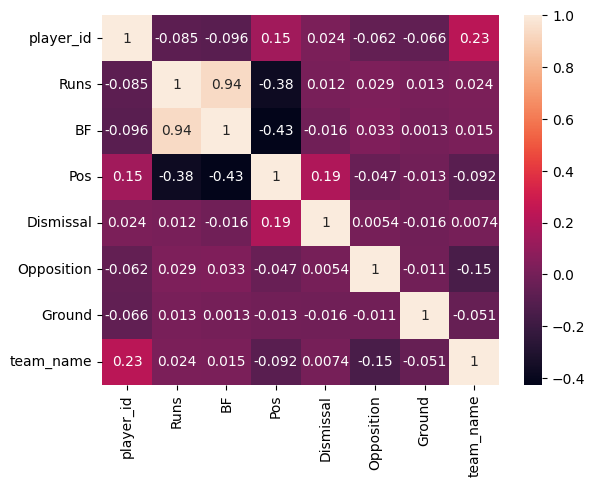

In [542]:
# Heat Map of numerical features

sns.heatmap(batting_df.corr(), annot=True)

From the above heatmap, we can see that Runs and BF are highly correlated. So we can drop one of them

In [543]:
# From the above heatmap, we can see that Runs and BF are highly correlated. So we can drop one of them

batting_df.drop(columns=['BF'], inplace=True)
batting_df

,player_id,Runs,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,1,2,9,109,2 Oct 2013,0,Hashmatullah Shahidi
1,440970,13,5,4,2,9,109,4 Oct 2013,0,Hashmatullah Shahidi
2,440970,38,4,4,2,6,77,1 May 2014,0,Hashmatullah Shahidi
3,440970,3,4,3,1,18,77,2 May 2014,0,Hashmatullah Shahidi
4,440970,15,4,1,1,21,19,18 Jul 2014,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,11,4,2,12,6,25 Mar 2023,17,Dilshan Madushanka
9322,793007,1,11,4,1,11,19,30 Jun 2023,17,Dilshan Madushanka
9325,793007,0,11,4,1,11,61,9 Jul 2023,17,Dilshan Madushanka
9326,793007,4,11,4,2,16,38,7 Oct 2023,17,Dilshan Madushanka


In [544]:
batting_df.drop(columns=['player_name'], inplace=True)
batting_df

,player_id,Runs,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name
0,440970,0,3,1,2,9,109,2 Oct 2013,0
1,440970,13,5,4,2,9,109,4 Oct 2013,0
2,440970,38,4,4,2,6,77,1 May 2014,0
3,440970,3,4,3,1,18,77,2 May 2014,0
4,440970,15,4,1,1,21,19,18 Jul 2014,0
...,...,...,...,...,...,...,...,...,...
9321,793007,4,11,4,2,12,6,25 Mar 2023,17
9322,793007,1,11,4,1,11,19,30 Jun 2023,17
9325,793007,0,11,4,1,11,61,9 Jul 2023,17
9326,793007,4,11,4,2,16,38,7 Oct 2023,17


### Bowling Data

In [545]:
bowling_df.drop(columns=['player_name'], inplace=True)
bowling_df

,player_id,overs,runs,wickets,economy,innings,opposition,ground,start_date,team_name
3,440970,2.0,17,0,8.50,2,18,77,2 May 2014,0
12,440970,1.0,8,0,8.00,2,21,61,16 Feb 2017,0
129,533956,3.0,10,0,3.33,1,15,109,6 Mar 2013,0
130,533956,5.0,22,0,4.40,1,15,109,8 Mar 2013,0
131,533956,1.5,7,1,3.81,1,9,109,2 Oct 2013,0
...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,86,2,8.60,1,16,38,7 Oct 2023,17
9327,793007,9.2,60,2,6.42,2,14,63,10 Oct 2023,17
9328,793007,9.0,38,3,4.22,2,1,82,16 Oct 2023,17
9329,793007,9.4,49,4,5.06,1,11,82,21 Oct 2023,17


<Axes: >

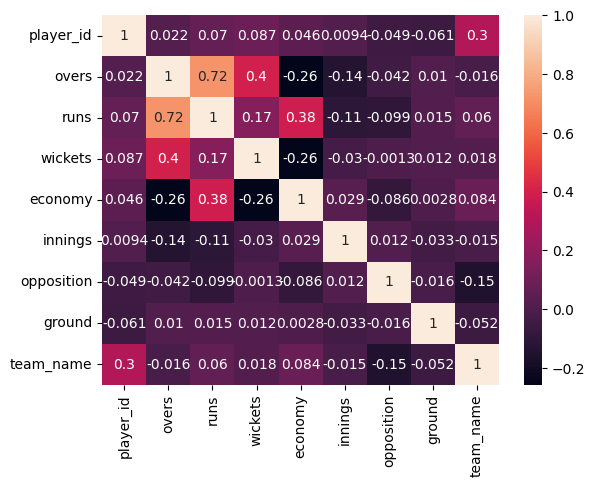

In [546]:
sns.heatmap(bowling_df.corr(), annot=True)

1. From the above heatmap, we can see that overs and runs are highly correlated. So we can drop one of them
2. Also, economy and runs are highly correlated. So we can drop one of them

In [547]:
bowling_df.drop(columns=['overs'], inplace=True)
bowling_df.drop(columns=['runs'], inplace=True)
bowling_df


,player_id,wickets,economy,innings,opposition,ground,start_date,team_name
3,440970,0,8.50,2,18,77,2 May 2014,0
12,440970,0,8.00,2,21,61,16 Feb 2017,0
129,533956,0,3.33,1,15,109,6 Mar 2013,0
130,533956,0,4.40,1,15,109,8 Mar 2013,0
131,533956,1,3.81,1,9,109,2 Oct 2013,0
...,...,...,...,...,...,...,...,...
9326,793007,2,8.60,1,16,38,7 Oct 2023,17
9327,793007,2,6.42,2,14,63,10 Oct 2023,17
9328,793007,3,4.22,2,1,82,16 Oct 2023,17
9329,793007,4,5.06,1,11,82,21 Oct 2023,17


## Regression

### Tasks

1. Predict the runs batsman will score in a match.
2. Predict the wickets a bowler will take in a match.
3. Predict the economy of a bowler in a match.
4. Predict the type of dismissal of a batsman in a match.

### Models

1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regression
4. Logistic Regression

`Use the batting_df and bowling_df to train and test the models.`